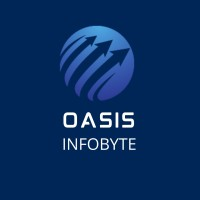

# Data Science Internship
# - Anisha Walde
# Task-2: Unemployment Analysis with Python 

**Objective:** Perform comprehensive data analysis and visualization of unemployment rate data to understand trends, distributions, and potential impacts of COVID-19 on unemployment rates.

In [1]:
# Import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [3]:
# Display the first few rows of the dataset
data.head() 

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [5]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [6]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate (%),267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


In [8]:
data.shape

(267, 9)

In [9]:
data.size

2403

In [10]:
# Check for missing values
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


# Data preprocessing

In [12]:
# Convert the ' Date' column to datetime format
data[' Date'] = pd.to_datetime(data[' Date'])

# Calculate summary statistics:

In [13]:
mean_unemployment_rate = data[' Estimated Unemployment Rate (%)'].mean()
median_unemployment_rate = data[' Estimated Unemployment Rate (%)'].median()
std_deviation_unemployment_rate = data[' Estimated Unemployment Rate (%)'].std()
minimum_unemployment_rate = data[' Estimated Unemployment Rate (%)'].min()
maximum_unemployment_rate = data[' Estimated Unemployment Rate (%)'].max()

# Display the calculated statistics
print(f"Mean Unemployment Rate: {mean_unemployment_rate:.2f}%")
print(f"Median Unemployment Rate: {median_unemployment_rate:.2f}%")
print(f"Standard Deviation of Unemployment Rate: {std_deviation_unemployment_rate:.2f}")
print(f"Minimum Unemployment Rate: {minimum_unemployment_rate:.2f}%")
print(f"Maximum Unemployment Rate: {maximum_unemployment_rate:.2f}%")


Mean Unemployment Rate: 12.24%
Median Unemployment Rate: 9.65%
Standard Deviation of Unemployment Rate: 10.80
Minimum Unemployment Rate: 0.50%
Maximum Unemployment Rate: 75.85%


# Data visualization

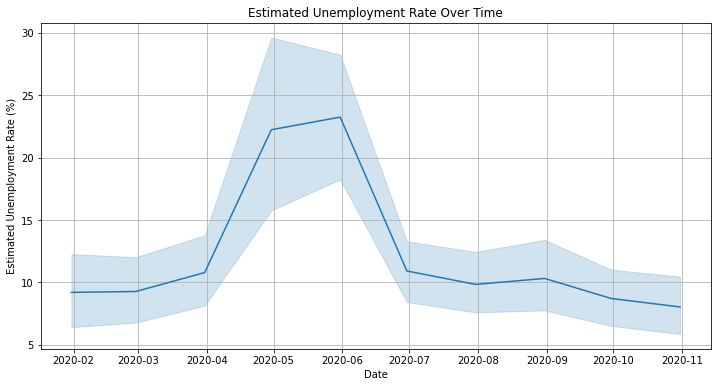

In [14]:
# Line plot of Estimated Unemployment Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=data)
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()

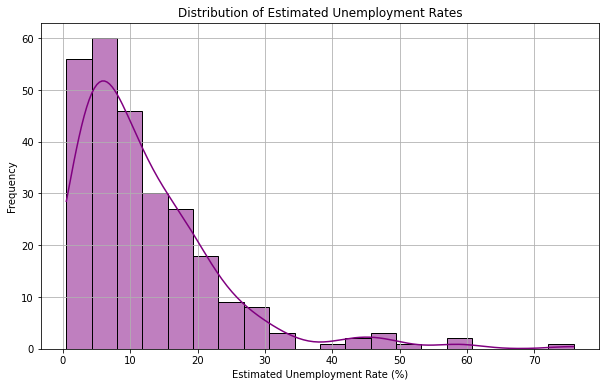

In [15]:
# Histogram of Estimated Unemployment Rate
plt.figure(figsize=(10, 6))
sns.histplot(data[' Estimated Unemployment Rate (%)'], bins=20, kde=True, color='purple')
plt.title('Distribution of Estimated Unemployment Rates')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

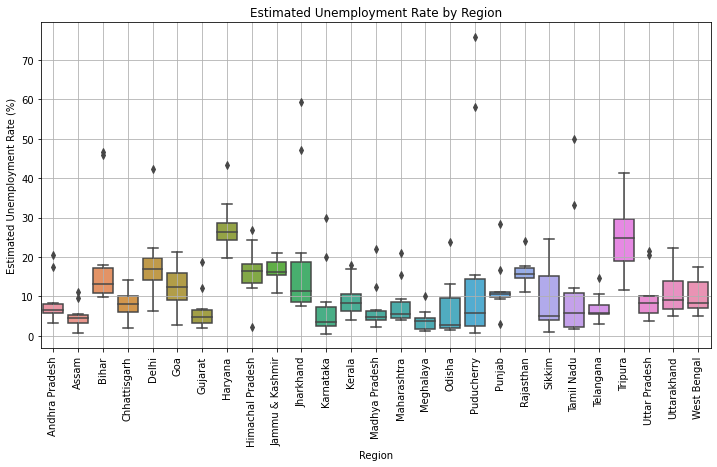

In [16]:
# Box plot of Estimated Unemployment Rate by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=data)
plt.title('Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

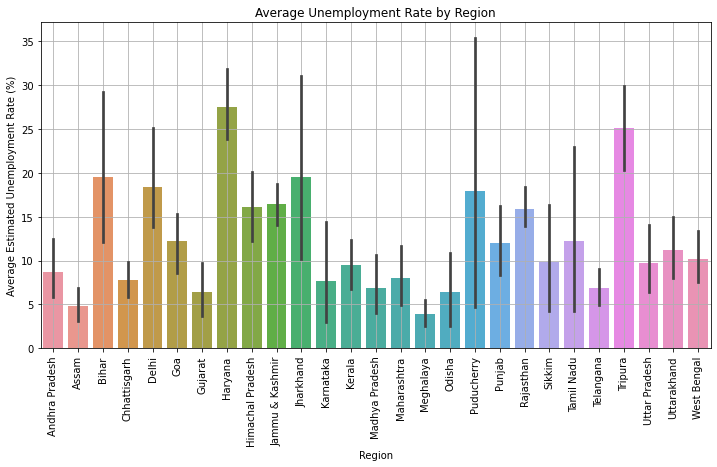

In [17]:
# bar plot of Average Unemployment Rate by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=data)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

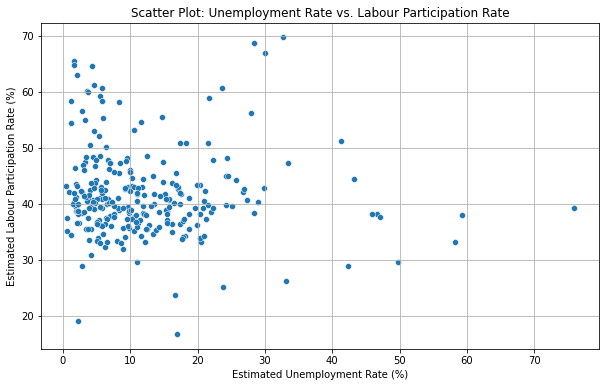

In [18]:
# Scatter Plot of Unemployment Rate vs. Labour Participation Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Labour Participation Rate (%)', data=data)
plt.title('Scatter Plot: Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.grid(True)
plt.show()

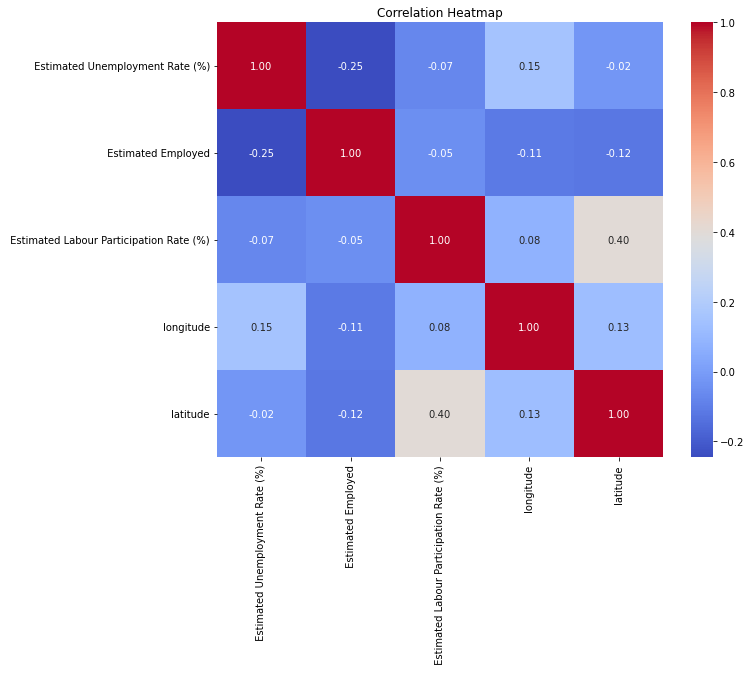

In [19]:
# Heatmap of Correlation
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

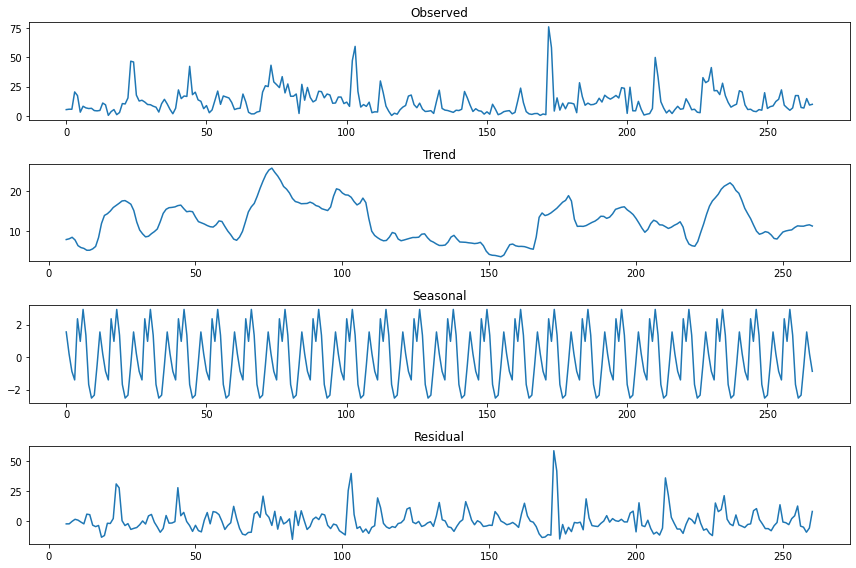

In [20]:
# Time Series Decomposition
decomposition = seasonal_decompose(data[' Estimated Unemployment Rate (%)'], model='additive', period=12)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()

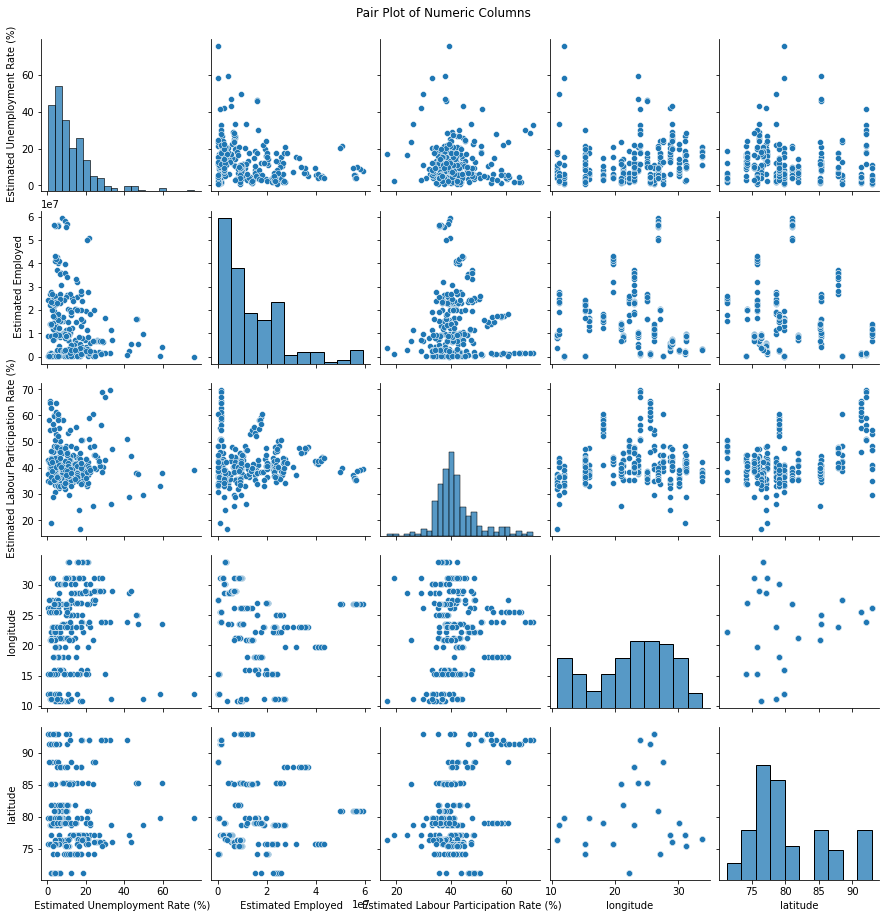

In [21]:
sns.pairplot(numeric_columns)
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

# Hypothesis Testing

In [22]:
# e.g., comparing unemployment rates before and during COVID-19
covid_start_date = pd.to_datetime('2020-03-01')
before_covid = data[data[' Date'] < covid_start_date][' Estimated Unemployment Rate (%)']
during_covid = data[data[' Date'] >= covid_start_date][' Estimated Unemployment Rate (%)']

t_stat, p_value = ttest_ind(before_covid, during_covid)
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.6f}")

if p_value < 0.05:
    print("The difference in unemployment rates before and during COVID-19 is statistically significant.")
else:
    print("There is no statistically significant difference in unemployment rates before and during COVID-19.")


T-Statistic: -2.25
P-Value: 0.025093
The difference in unemployment rates before and during COVID-19 is statistically significant.


**Thank You!**